In [26]:
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
class AddGaussianNoise:
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

In [31]:
def plot_histogram(img,title):
    y,x = torch.histogram(img,bins=100)
    y = y.numpy()
    x = x.numpy()
    plt.plot(x[1:],y)
    plt.title(title)

In [19]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                AddGaussianNoise(mean=0.0, std=0.1),
                                transforms.Grayscale(num_output_channels=1)])

In [20]:
test_image = Image.open('testImage.jpg')
test_image = transform(test_image)
test_image.shape

torch.Size([1, 177, 285])

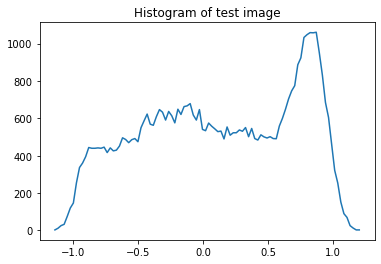

In [32]:
plot_histogram(test_image, 'Histogram of test image')